<a href="https://colab.research.google.com/github/shaharlavian/Traffic-Sign-Detection/blob/main/Traffic_Sign_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## GPU

In [ ]:
!nvidia-smi

Thu Sep 12 17:10:15 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import torch
print(torch.cuda.is_available())

## Import Data & packages

In [ ]:
! pip install kaggle

In [ ]:
! kaggle datasets download -d pkdarabi/cardetection --unzip

Dataset URL: https://www.kaggle.com/datasets/pkdarabi/cardetection
License(s): Attribution 4.0 International (CC BY 4.0)
100% 99.8M/99.8M [00:05<00:00, 23.9MB/s]
100% 99.8M/99.8M [00:05<00:00, 18.7MB/s]


In [ ]:
! pip install ultralytics

In [ ]:
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
from IPython.display import display
from IPython.display import display, Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')


In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.92 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 34.0/112.6 GB disk)


## Train

In [ ]:
# List the files in your current directory
os.listdir('./')


['.config',
 'bus.jpg',
 'yolov8m.pt',
 'yolov8n.pt',
 'yolov8n-seg.pt',
 'video.mp4',
 'yolov8n.torchscript',
 'runs',
 'datasets',
 'car',
 'zidane.jpg']

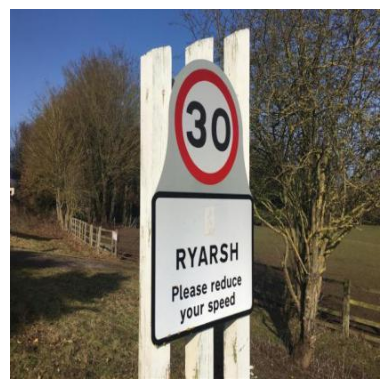

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#example for image
image_path = '/content/car/train/images/000000_jpg.rf.b11f308f16626f9f795a148029c46d10.jpg'

# Load and display the image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()


In [ ]:
# train model with Yolov8
!yolo task=detect mode=train model=yolov8m.pt data=/content/car/data.yaml epochs=30 imgsz=320

Ultralytics YOLOv8.2.92 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/car/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_box

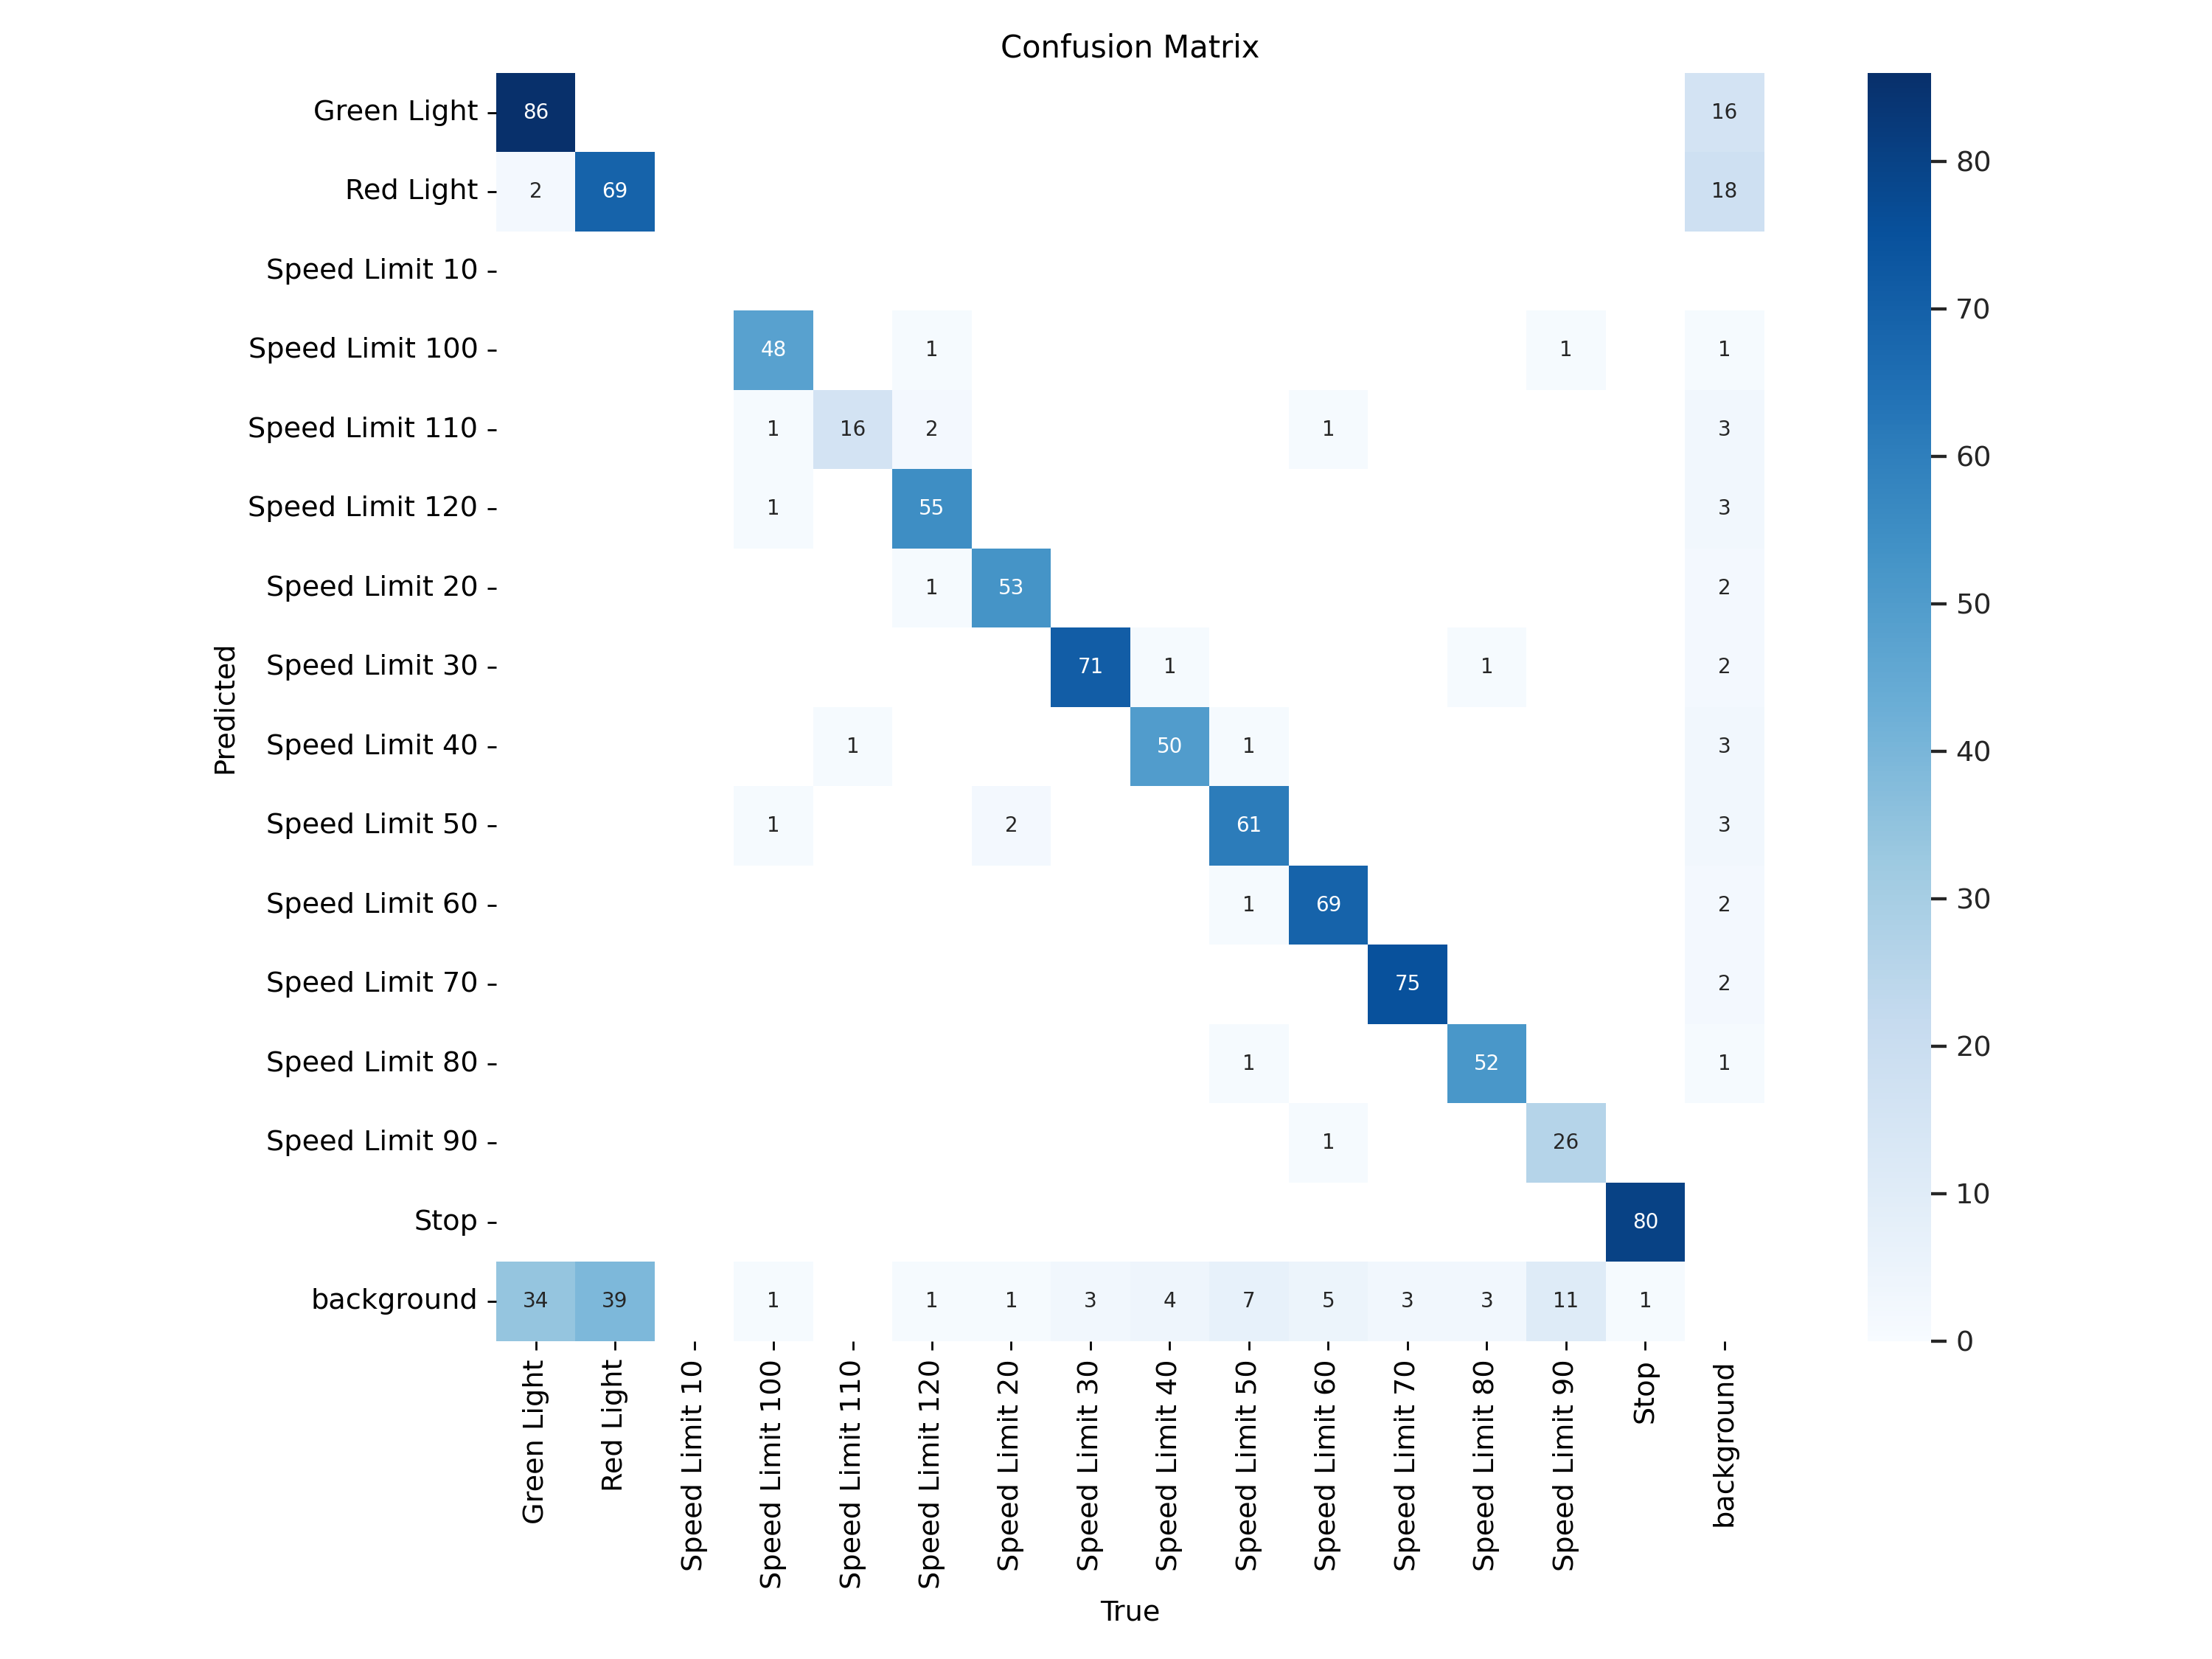

In [ ]:
# confusion matrix
Image(filename=f'/content/runs/detect/train5/confusion_matrix.png')

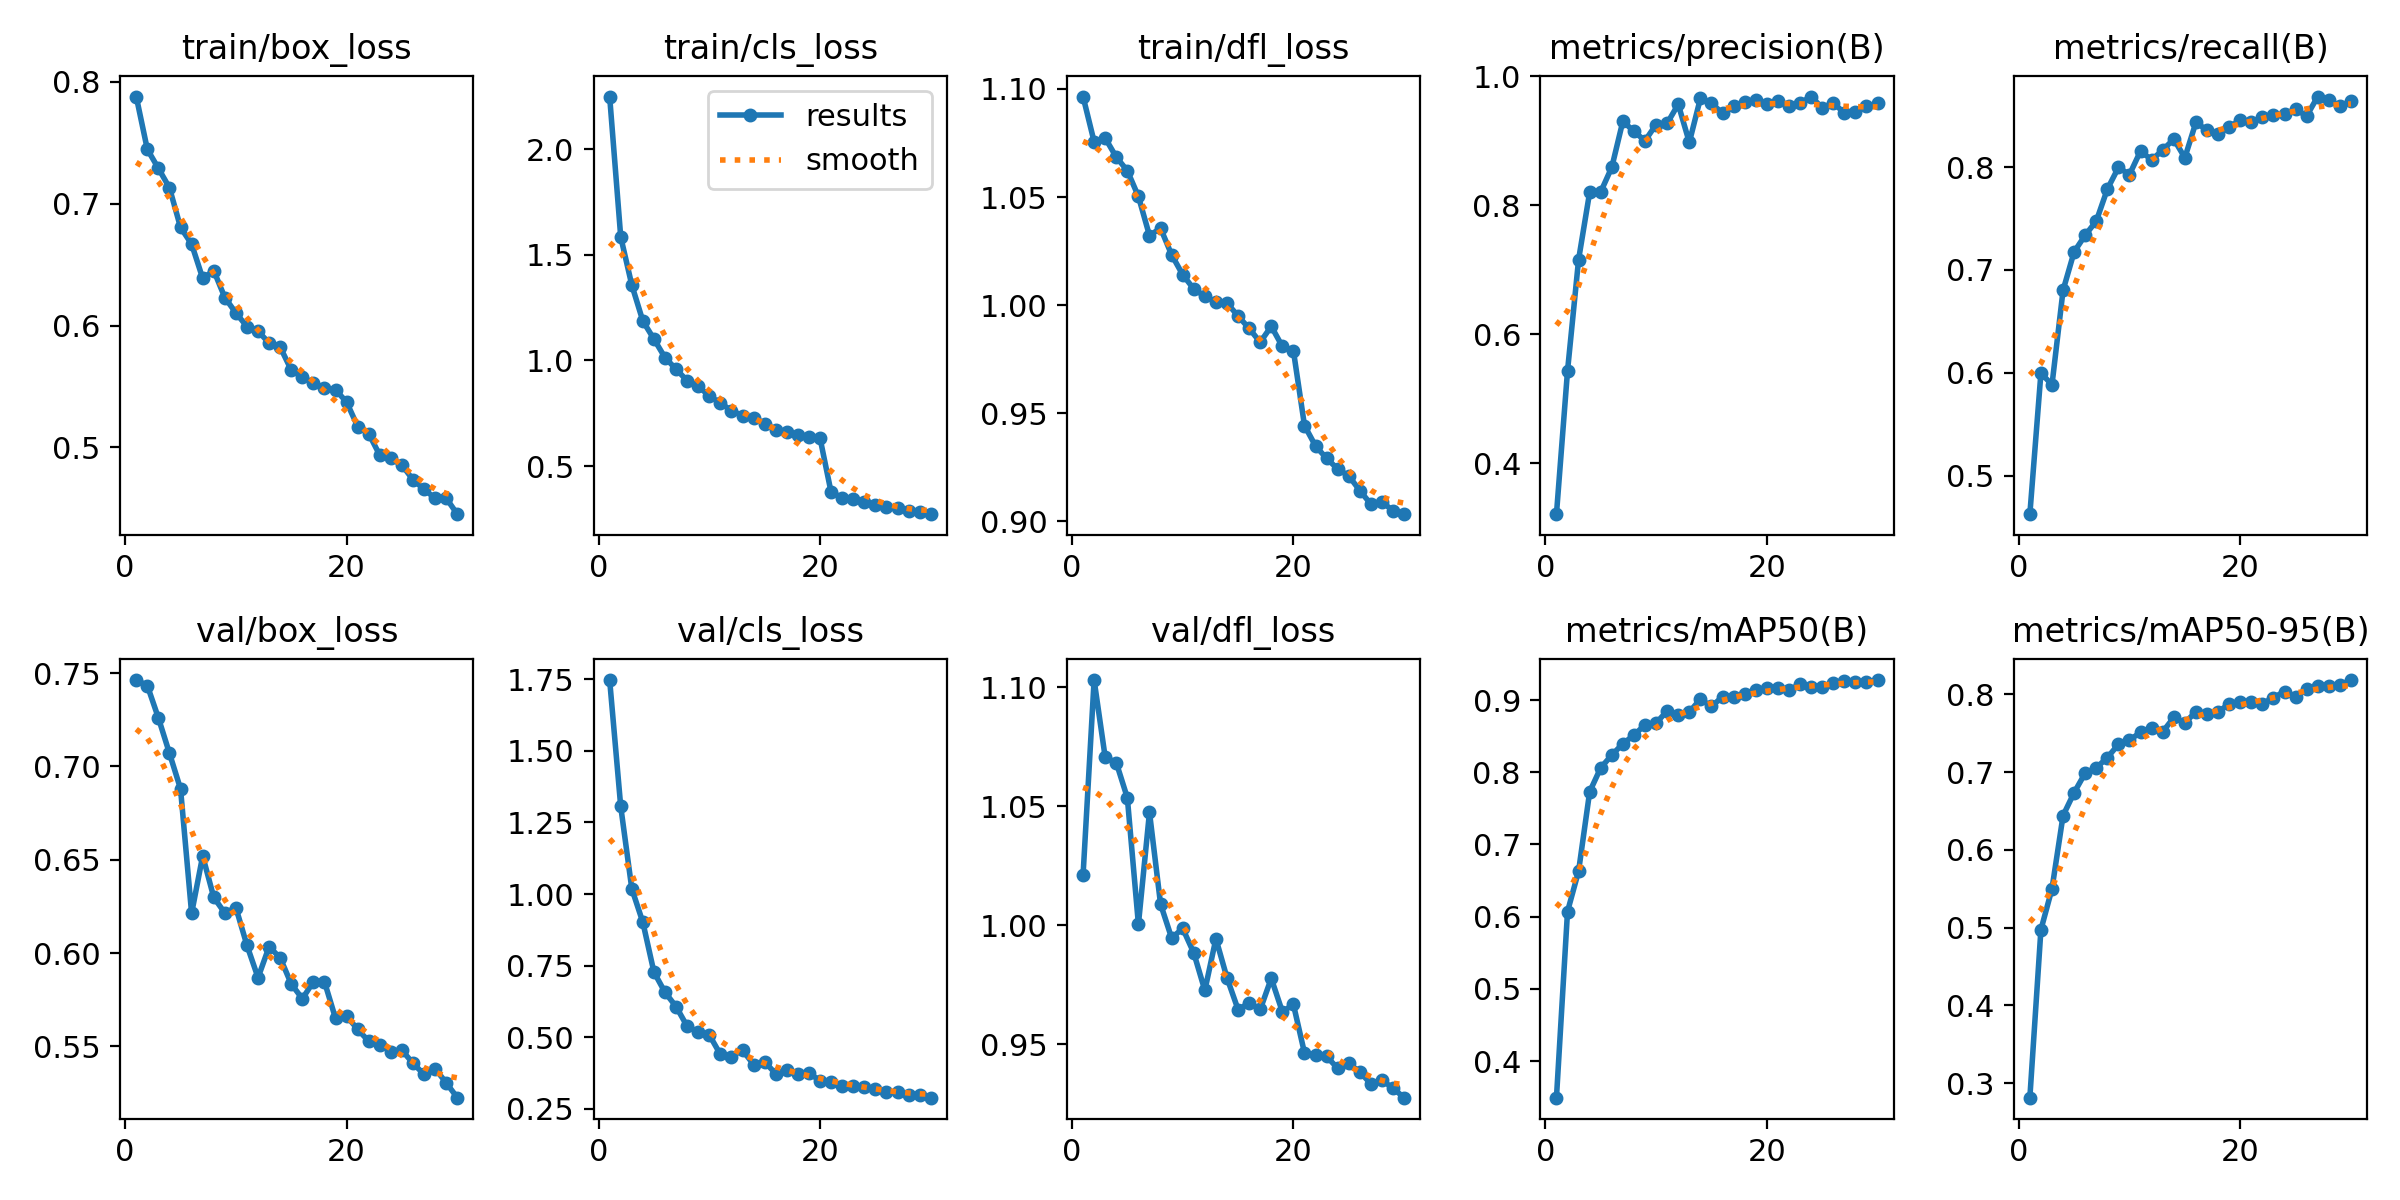

In [ ]:
# model results plot

Image(filename=f'/content/runs/detect/train5/results.png')

In [ ]:
# test the model with best.pt
!yolo task=detect mode=predict model=/content/runs/detect/train5/weights/best.pt source=/content/car/test/images imgsz=320


Ultralytics YOLOv8.2.92 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,848,445 parameters, 0 gradients, 78.7 GFLOPs

image 1/638 /content/car/test/images/000003_jpg.rf.8511b9c219dbf9799a6d58900b15917d.jpg: 320x320 1 Speed Limit 30, 16.2ms
image 2/638 /content/car/test/images/000006_jpg.rf.89610ec419ccfab22f8314026b90ee26.jpg: 320x320 1 Speed Limit 30, 16.0ms
image 3/638 /content/car/test/images/00000_00000_00003_png.rf.d18afc3c9625ffb1974029d3e3762aee.jpg: 320x320 1 Speed Limit 20, 15.8ms
image 4/638 /content/car/test/images/00000_00000_00005_png.rf.ab60a274676963d378f5014e89d9e2b1.jpg: 320x320 1 Speed Limit 20, 15.8ms
image 5/638 /content/car/test/images/00000_00000_00006_png.rf.9d1ea68507aff6973a1dbcdc6f4422a8.jpg: 320x320 1 Speed Limit 20, 15.8ms
image 6/638 /content/car/test/images/00000_00000_00008_png.rf.ff305dcd6e9ceb9188937311a4a1b207.jpg: 320x320 1 Speed Limit 20, 15.8ms
image 7/638 /content/car/test/images/00000_00000_0001

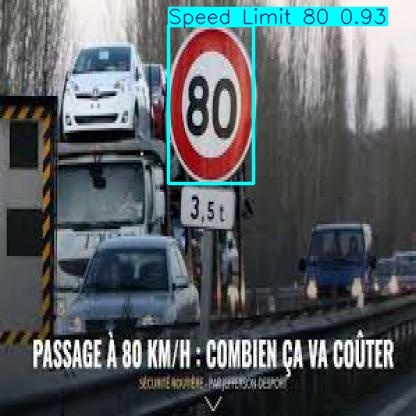

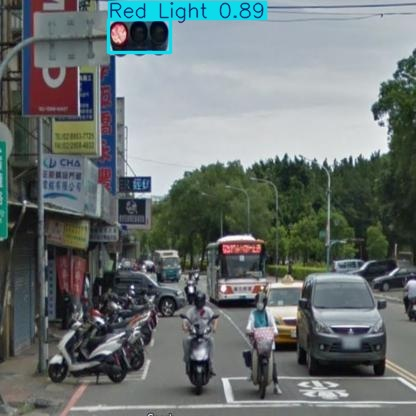

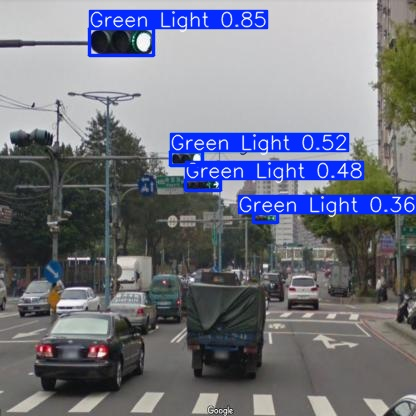

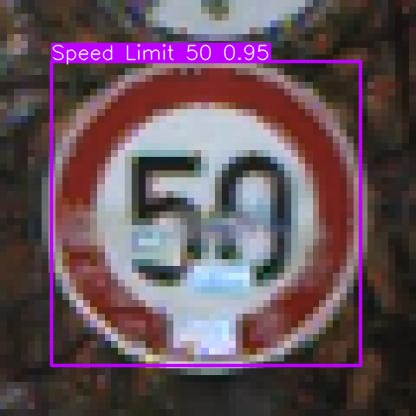

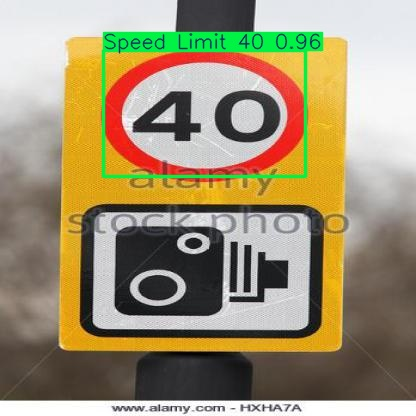

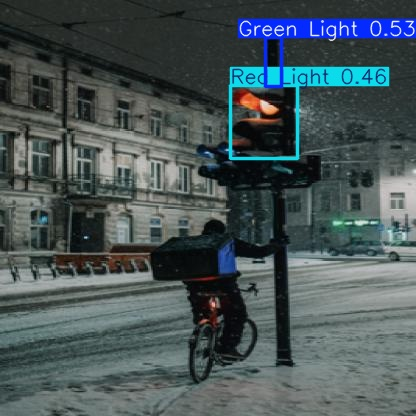

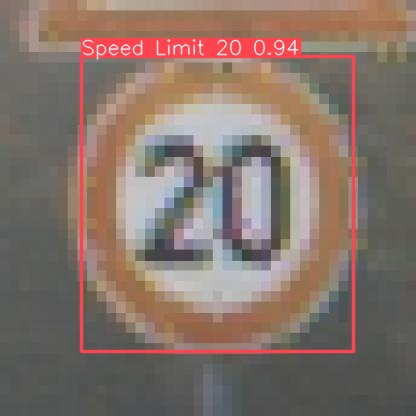

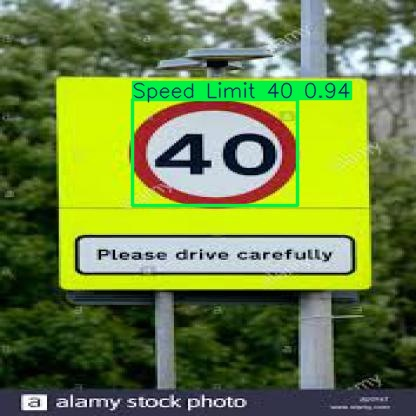

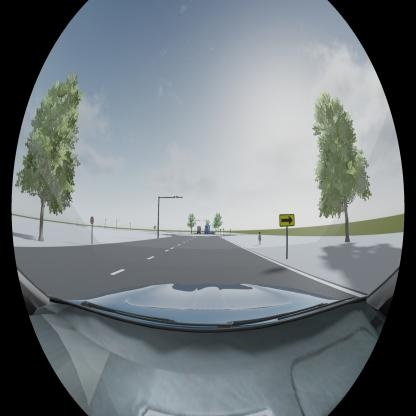

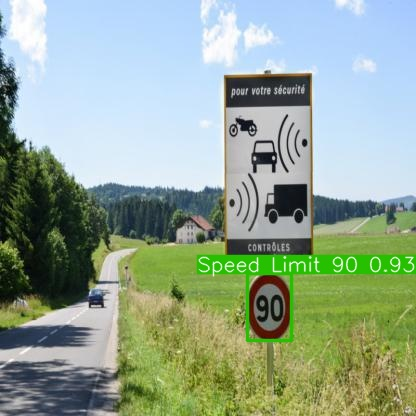

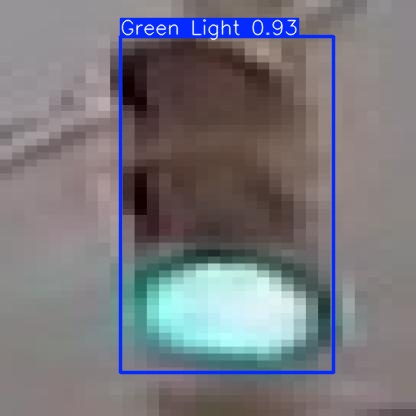

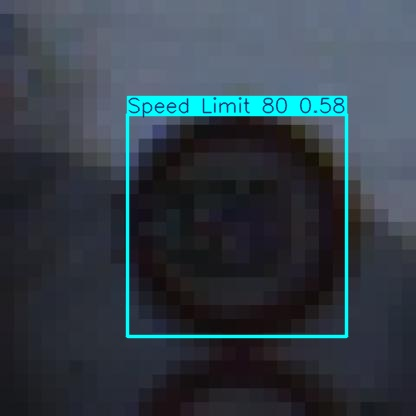

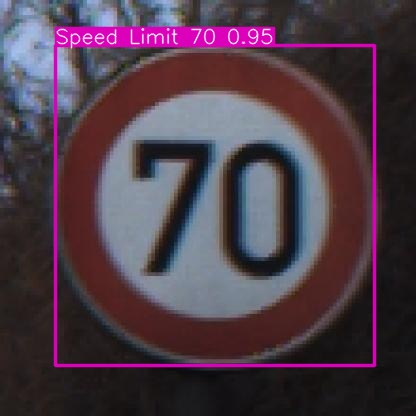

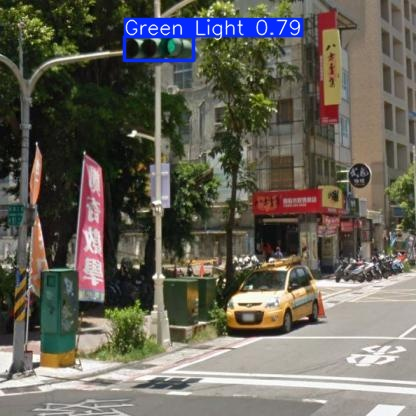

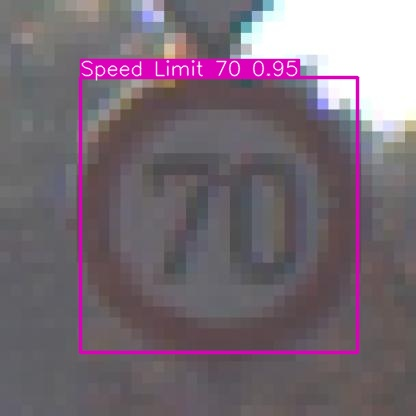

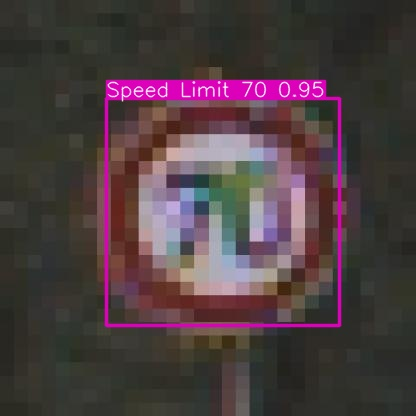

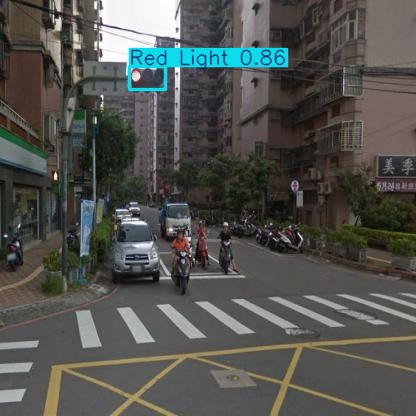

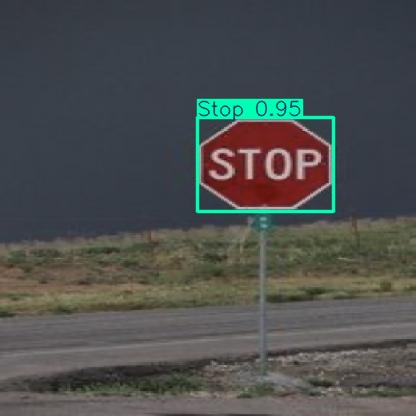

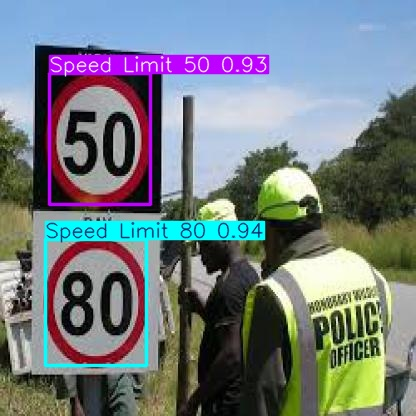

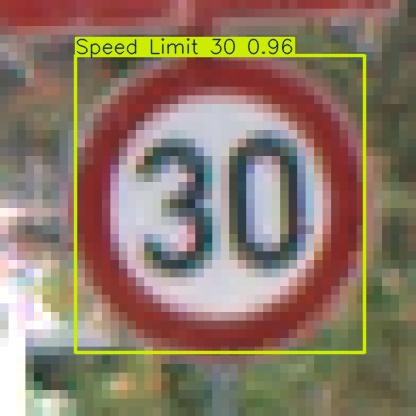

In [ ]:
# example for 20 images

import glob
from IPython.display import Image, display

# List the prediction images
image_paths = glob.glob('runs/detect/predict3/*.jpg')

# Display the first few detected images
for image_path in image_paths[:20]:
    display(Image(filename=image_path, height=600))